Importar librerias

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
#paquete para manejar varable de entorno(variable q esta en otra parte del codigo)
from dotenv import load_dotenv
import os

In [3]:
#Desactivar warnings
import warnings
warnings.filterwarnings('ignore')

Conexión a Base de datos

In [4]:
import os

def cargar_variables_entorno(archivo):
    # Abrir el archivo de texto con las variables
    with open(archivo, 'r') as file:
        # Leer cada línea y configurar las variables de entorno
        for line in file:
            # Limpiar posibles saltos de línea y separar la clave y valor
            clave, valor = line.strip().split('=')
            os.environ[clave] = valor  # Establecer la variable de entorno

# Llamar a la función con el archivo config.txt
cargar_variables_entorno('C:\\Users\\Public\\PF\\config.txt')

# Ahora puedes acceder a las variables de entorno
host = os.getenv('HOST')
dbName = os.getenv('DB_NAME')
port = int(os.getenv('PORT'))  # Asegúrate de convertir a entero si es necesario
user = os.getenv('USER')
pswd = os.getenv('PASSWORD')

print(f"Host: {host}, DB Name: {dbName}, Port: {port}, User: {user}, Password: {pswd}")

Host: junction.proxy.rlwy.net, DB Name: railway, Port: 53597, User: root, Password: BpPAiNxOCYzqLjAKnqqtWOnoisURAuhw


In [5]:
user = os.getenv('USER')
pswd = os.getenv('PASSWORD')
host = os.getenv('HOST')
dbName = os.getenv('DB_NAME')
port = int(os.getenv('PORT'))

try:
    connection = pymysql.connect(host = host, user = user, passwd = pswd, database = dbName, port = port)
    cursor = connection.cursor()
    print (cursor) # Muestra el cursor si todo funciona correctamente

except pymysql.Error as e:
    print("Error en la conexión:", e)

Creacion de los df para realizar EDA

In [6]:
#Tabla aircrafts
query = "SELECT * FROM aircrafts_data;"
aircrafts_data = pd.read_sql_query(query, connection)

#Tabla airports
query = "SELECT * FROM airports_data;"
airports_data = pd.read_sql_query(query, connection)

#Tabla boarding_passes
query = "SELECT * FROM boarding_passes;"
boarding_passes = pd.read_sql_query(query, connection)

#Tabla bookings
query = "SELECT * FROM bookings;"
bookings = pd.read_sql_query(query, connection)

#Tabla flights
query = "SELECT * FROM flights;"
flights = pd.read_sql_query(query, connection)

#Tabla seats
query = "SELECT * FROM seats;"
seats = pd.read_sql_query(query, connection)

#Tabla ticket_flights
query = "SELECT * FROM ticket_flights;"
ticket_flights = pd.read_sql_query(query, connection)

#Tabla tickets
query = "SELECT * FROM tickets;"
tickets = pd.read_sql_query(query, connection)

Estadistica descriptiva

In [7]:
# Configurar el formato de visualización para evitar notación científica y mostrar dos decimales
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
#Estadistica descriptiva montos en tabla bookings
bookings['total_amount'].describe()

count    262788.00
mean      79025.61
std       77621.92
min        3400.00
25%       29000.00
50%       55900.00
75%       99200.00
max     1204500.00
Name: total_amount, dtype: float64

In [ ]:
#Estadistica descriptiva montos en tabla ticket_flights
ticket_flights['amount'].describe()

count   1045726.00
mean      19858.91
std       22612.39
min        3000.00
25%        7200.00
50%       13400.00
75%       23100.00
max      203300.00
Name: amount, dtype: float64

Rango de las aeronaves

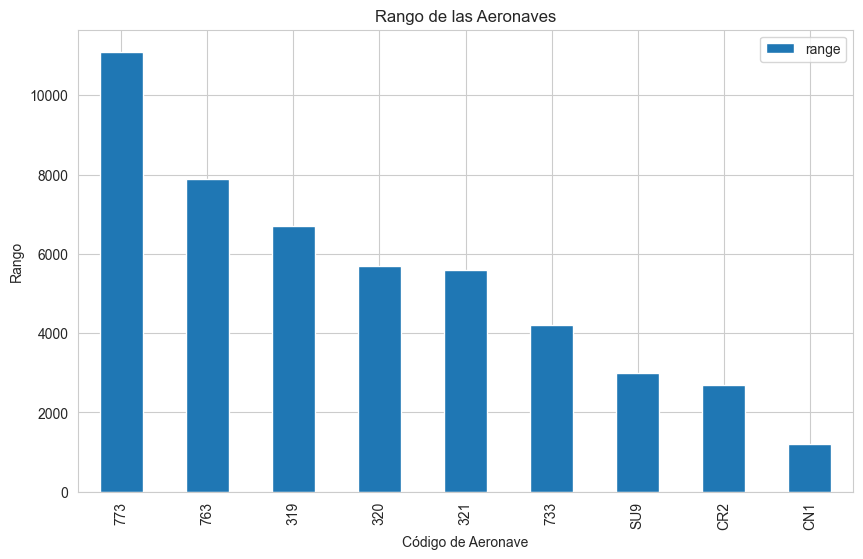

In [7]:
# Seleccionar las columnas necesarias del DataFrame
columnas_seleccionadas = aircrafts_data[['aircraft_code', 'range']]

# Ordenar las columnas por 'range' de mayor a menor
columnas_seleccionadas = aircrafts_data[['aircraft_code', 'range']].sort_values(by='range', ascending=False)

# Realizar el gráfico de barras
sns.set_style("whitegrid")  # Configurar el estilo
columnas_seleccionadas.plot(kind='bar', x='aircraft_code', y='range', figsize=(10, 6))

# Configuración general del gráfico
plt.xlabel('Código de Aeronave')
plt.ylabel('Rango')
plt.title('Rango de las Aeronaves')
plt.show()

El rango del aeronave representa el alcance en kilometros. El 773, es un avion de fuselaje ancho para vuelos largos. El A320, por ejemplo, es de fuselaje angosto para vuelos de mediano radio. Y el CR2, son aviones pequeños de vuelos regionales.

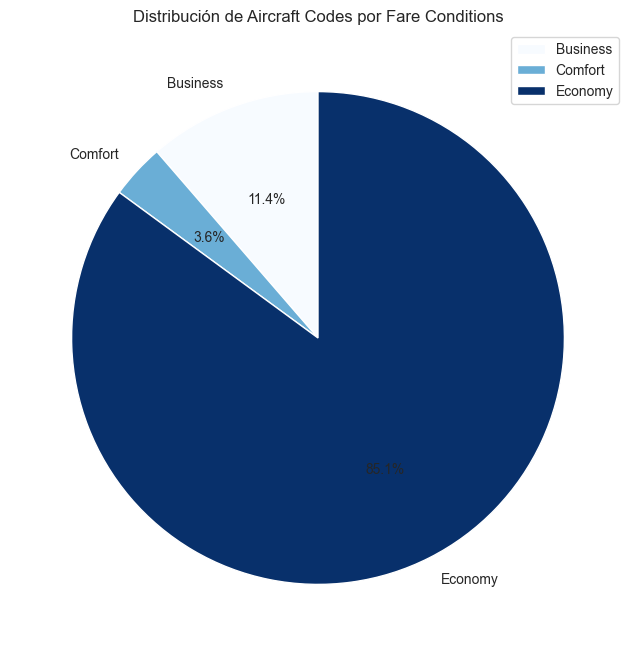

In [18]:
#Agrupar aeronave por fare_conditions 
aeronave_clase= seats.groupby('fare_conditions')['aircraft_code'].count()

plt.figure(figsize=(8, 8))
aeronave_clase.plot.pie(
    autopct='%1.1f%%',  # Mostrar porcentaje
    startangle=90,      # Comenzar desde la parte superior
    cmap='Blues',       # Paleta de colores
    legend=True         # Agregar leyenda
)

# Configuración del gráfico
plt.ylabel('')  # Eliminar etiqueta del eje Y
plt.title('Distribución de Aircraft Codes por Fare Conditions')
plt.show()

Aeropuertos por zona horaria

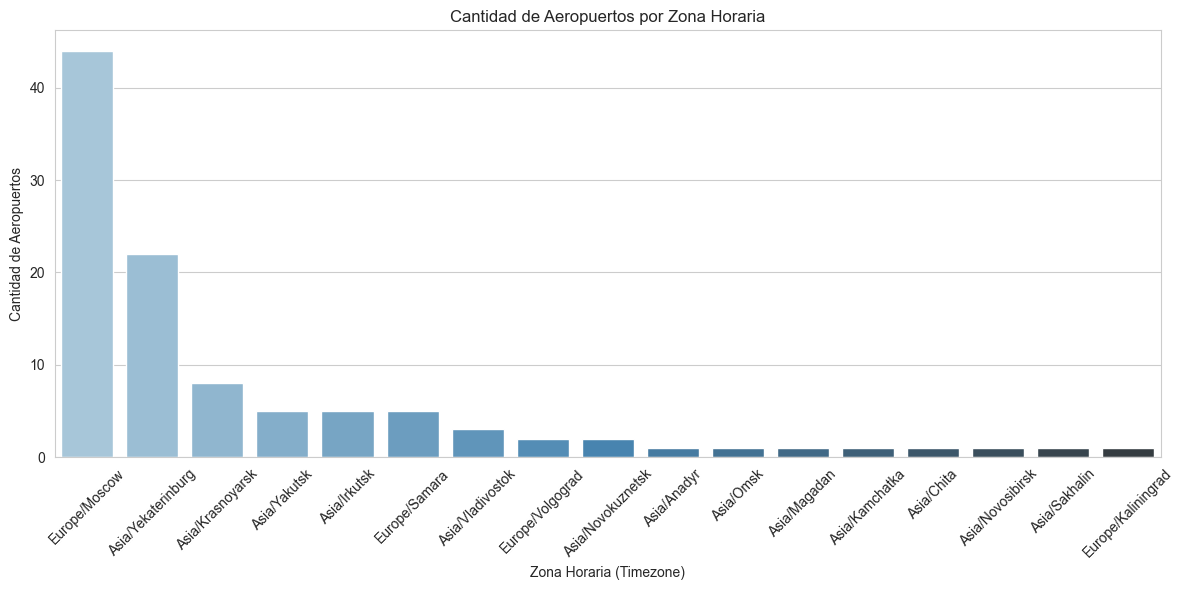

In [17]:
# Agrupar por 'timezone' y contar los 'airport_code'
airport_counts = airports_data.groupby('timezone')['airport_code'].count().reset_index()

# Renombrar la columna para mayor claridad
airport_counts.rename(columns={'airport_code': 'count'}, inplace=True)

# Ordenar los datos por cantidad de aeropuertos
airport_counts = airport_counts.sort_values(by='count', ascending=False)

# Crear el barplot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=airport_counts, x='timezone', y='count', palette='Blues_d')

# Configuración del gráfico
plt.xlabel('Zona Horaria (Timezone)')
plt.ylabel('Cantidad de Aeropuertos')
plt.title('Cantidad de Aeropuertos por Zona Horaria')
plt.xticks(rotation=45)  # Rotar etiquetas si hay muchas zonas horarias
plt.tight_layout()
plt.show()


Evolucion semanal Monto total de Reservas

In [8]:
# Conversion de la columna de date a datetime
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings.set_index('book_date', inplace=True) # Inplace para que se pise asimismo

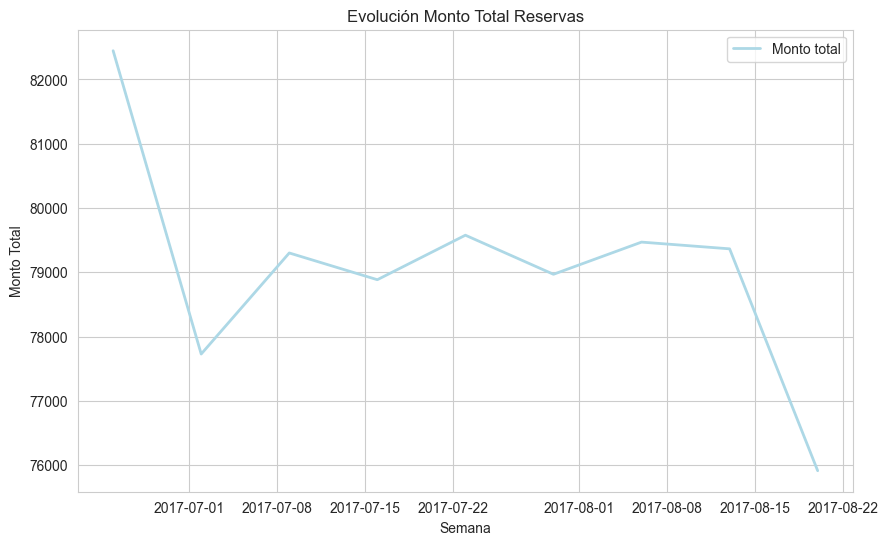

In [16]:
# Resampleo semanal y cálculo de la media
bookings_resampled = bookings.resample('W').mean(numeric_only=True).reset_index()

# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

sns.lineplot(data=bookings_resampled, x='book_date', y='total_amount', 
             label='Monto total', color='lightblue', linewidth=2)

# Configuración general del gráfico
plt.xlabel('Semana')
plt.ylabel('Monto Total')
plt.title('Evolución Monto Total Reservas')
plt.legend()
plt.show()


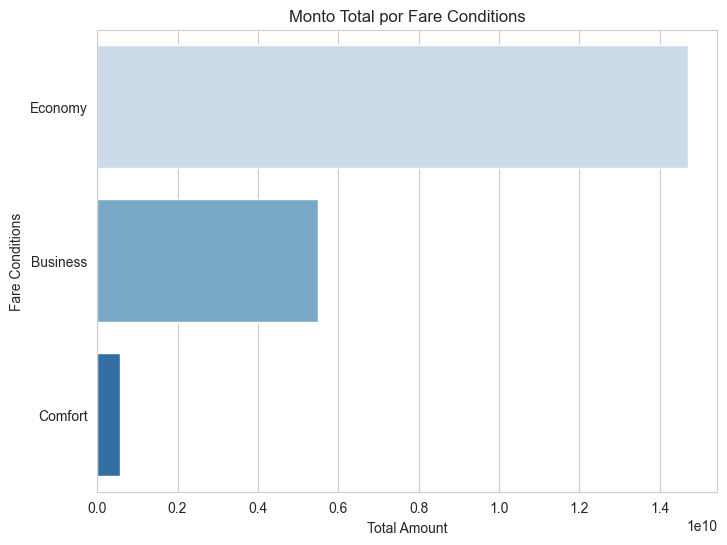

In [26]:
# Agrupar por fare_conditions y calcular la suma de amount
fare_conditions_summary = ticket_flights.groupby('fare_conditions')['amount'].sum().reset_index()

# Ordenar de mayor a menor por la columna 'amount'
fare_conditions_summary = fare_conditions_summary.sort_values('amount', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
sns.barplot(data=fare_conditions_summary, y='fare_conditions', x='amount', palette='Blues')

# Configuración del gráfico
plt.title('Monto Total por Fare Conditions')
plt.ylabel('Fare Conditions')
plt.xlabel('Total Amount')
plt.show()

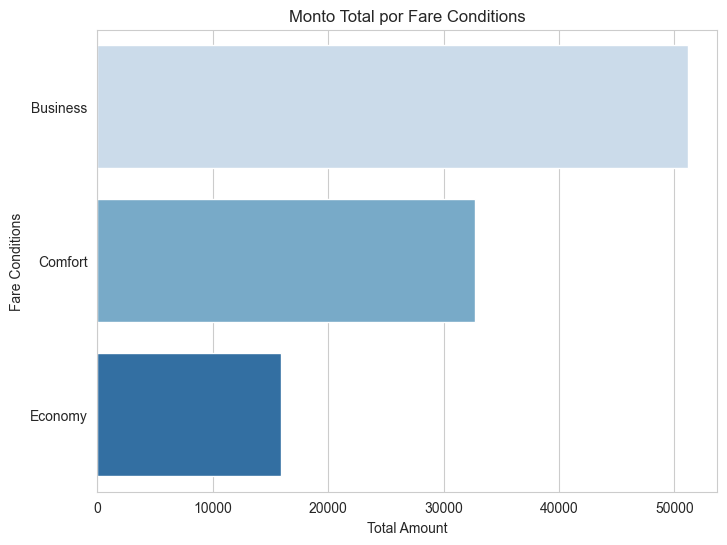

In [27]:
# Agrupar por fare_conditions y calcular la suma de amount
fare_conditions_summary = ticket_flights.groupby('fare_conditions')['amount'].mean().reset_index()

# Ordenar de mayor a menor por la columna 'amount'
fare_conditions_summary = fare_conditions_summary.sort_values('amount', ascending=False)

# Crear el gráfico de barras horizontal
plt.figure(figsize=(8, 6))
sns.barplot(data=fare_conditions_summary, y='fare_conditions', x='amount', palette='Blues')

# Configuración del gráfico
plt.title('Monto Total por Fare Conditions')
plt.ylabel('Fare Conditions')
plt.xlabel('Total Amount')
plt.show()

In [28]:
# Relacionar df1 y df2 a partir de la columna 'flight_id'
df_relacionado = flights.merge(ticket_flights, on='flight_id', how='inner')

# Mostrar el DataFrame resultante
print(df_relacionado)

         flight_id flight_no scheduled_departure   scheduled_arrival  \
0                1    PG0405 2017-07-16 09:35:00 2017-07-16 10:30:00   
1                1    PG0405 2017-07-16 09:35:00 2017-07-16 10:30:00   
2                1    PG0405 2017-07-16 09:35:00 2017-07-16 10:30:00   
3                1    PG0405 2017-07-16 09:35:00 2017-07-16 10:30:00   
4                1    PG0405 2017-07-16 09:35:00 2017-07-16 10:30:00   
...            ...       ...                 ...                 ...   
1045721      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   
1045722      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   
1045723      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   
1045724      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   
1045725      33121    PG0063 2017-08-26 19:25:00 2017-08-26 20:10:00   

        departure_airport arrival_airport     status aircraft_code  \
0                     DME             LED    Arrived           32